In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
seg_data = data.copy()

In [4]:
seg_data["Sex"] = seg_data["Sex"].replace({0:"male", 1:"female"})
seg_data["Marital status"] = seg_data["Marital status"].replace({0:"single", 1:"non-single"})
seg_data["Education"] = seg_data["Education"].replace({0:"other/unknown", 1:"high school", 2:"university", 3:"graduate school"})
seg_data["Occupation"]= seg_data["Occupation"].replace({0:"unskilled", 1:"skilled", 2:"highly qualified"})
seg_data["Settlement size"]= seg_data["Settlement size"].replace({0:"small city", 1:"mid-sized city", 2:"big city"})
seg_data.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,male,single,67,university,124670,skilled,big city
1,100000002,female,non-single,22,high school,150773,skilled,big city
2,100000003,male,single,49,high school,89210,unskilled,small city
3,100000004,male,single,45,high school,171565,skilled,mid-sized city
4,100000005,male,single,53,high school,149031,skilled,mid-sized city
5,100000006,male,single,35,high school,144848,unskilled,small city
6,100000007,male,single,53,high school,156495,skilled,mid-sized city
7,100000008,male,single,35,high school,193621,highly qualified,mid-sized city
8,100000009,male,non-single,61,university,151591,unskilled,small city
9,100000010,male,non-single,28,high school,174646,highly qualified,small city


In [5]:
seg_data = seg_data.drop(["ID"], axis=1)
seg_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,male,single,67,university,124670,skilled,big city
1,female,non-single,22,high school,150773,skilled,big city
2,male,single,49,high school,89210,unskilled,small city
3,male,single,45,high school,171565,skilled,mid-sized city
4,male,single,53,high school,149031,skilled,mid-sized city


In [6]:
seg_data.describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [7]:
for col in seg_data: 
    if seg_data[col].dtypes == "O": 
        print(col)
        print(seg_data[col].value_counts())
        print("-"*40)

Sex
male      1086
female     914
Name: Sex, dtype: int64
----------------------------------------
Marital status
single        1007
non-single     993
Name: Marital status, dtype: int64
----------------------------------------
Education
high school        1386
university          291
other/unknown       287
graduate school      36
Name: Education, dtype: int64
----------------------------------------
Occupation
skilled             1113
unskilled            633
highly qualified     254
Name: Occupation, dtype: int64
----------------------------------------
Settlement size
small city        989
mid-sized city    544
big city          467
Name: Settlement size, dtype: int64
----------------------------------------


In [8]:
nulls = seg_data[seg_data["Education"]=="other/unknown"]

for col in nulls: 
    if nulls[col].dtypes == "O": 
        print(col)
        print(nulls[col].value_counts())
        print("-"*40)

Sex
male      255
female     32
Name: Sex, dtype: int64
----------------------------------------
Marital status
single    287
Name: Marital status, dtype: int64
----------------------------------------
Education
other/unknown    287
Name: Education, dtype: int64
----------------------------------------
Occupation
skilled             168
unskilled            92
highly qualified     27
Name: Occupation, dtype: int64
----------------------------------------
Settlement size
small city        136
big city           84
mid-sized city     67
Name: Settlement size, dtype: int64
----------------------------------------


In [9]:
nulls.describe()

,Age,Income
count,287.000000,287.000000
mean,27.407666,115068.212544
std,3.235134,40058.777044
min,20.000000,43684.000000
25%,25.000000,87030.000000
50%,27.000000,111509.000000
75%,30.000000,133736.000000
max,33.000000,255198.000000


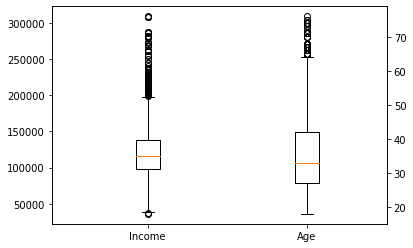

In [10]:
fig, ax = plt.subplots()
ax.boxplot(seg_data["Income"], positions=[1])
ax2 = ax.twinx()
ax2.boxplot(seg_data["Age"], positions=[2])
ax2.set_xticklabels(["Income", "Age"])
plt.show()

In [11]:
for i in range(43,70,10):
    print("Age more than",i,end=": ")
    print(len(seg_data[seg_data["Age"]>i]))

Age more than 43: 451
Age more than 53: 194
Age more than 63: 71


In [ ]:
tmp = max(seg_data["Income"])

for i in range(300000,0,-50000):
    print(f"Income between {tmp} and {i}",end=": ")
    outliers = seg_data[(seg_data["Income"]>i) & (seg_data["Income"]<=tmp)]
    print(len(outliers))
    print()
    for col in outliers: 
        if outliers[col].dtypes == "O": 
            print(col)
            print(outliers[col].value_counts())
            print("-"*40)
    print("-"*40)
    print()
    tmp = i

In [ ]:
fig, ax = plt.subplots()
#ax.boxplot([seg_data["Income"], seg_data["Age"]])
ax.boxplot(nulls["Income"], positions=[1])
ax2 = ax.twinx()
ax2.boxplot(nulls["Age"], positions=[2])
ax2.set_xticklabels(["Income", "Age"])
plt.show()

In [ ]:
outliers = seg_data[seg_data["Income"]>250000]
for col in seg_data: 
    if outliers[col].dtypes == "O": 
        print(col)
        print(outliers[col].value_counts())
        print("-"*40)

In [ ]:
sub_cat =[]
sub_cat.append(list(seg_data["Occupation"].unique()))
sub_cat.append(list(seg_data["Education"].unique()))

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

x ={}
for i in sub_cat[0]:
    for j in sub_cat[1]:
        sub_data = seg_data[(seg_data["Occupation"]==i) & (seg_data["Education"]==j)]
        x[f"{i} / {j}"] = sub_data["Income"].sum() / sub_data["Income"].count()

ax.barh(list(x.keys()),x.values())
ax.set_title("Income Mean")
plt.show()

In [ ]:
data = data.drop(["ID"], axis=1)
X = data[data["Education"] != 0]
y = X["Education"]
X = X.drop(["Education"], axis=1)
print(y.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X=s.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
X_train = X
X_test = data[data["Education"] == 0]
X_test = X_test.drop(["Education"], axis = 1)
X_test = s.fit_transform(X_test)
y_train = y

In [ ]:
X_train.shape

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
y=list(y)

In [ ]:
X = pd.DataFrame(X, columns=["Sex", "Marital status", "Age", "Income", "Occupation", "Settlement size"])
X["Education"] = y
X

In [ ]:
new = pd.DataFrame(X_test, columns=["Sex", "Marital status", "Age", "Income", "Occupation", "Settlement size"])

In [ ]:
new["Education"] = y_pred
X = pd.DataFrame(X, columns=["Sex", "Marital status", "Age", "Income", "Occupation", "Settlement size"])
X["Education"] = y
new = new.append(X, ignore_index = True)
new

In [ ]:
X.isnull().sum()

In [ ]:
from sklearn.cluster import KMeans
error=[]
k_range=range(1,18)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(new)
    error.append(km.inertia_)

from matplotlib import pyplot as plt 
plt.plot(k_range,error)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
y=km.fit_predict(new)
new=pd.DataFrame(new)
new['y']=y
new